In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/'My Drive'/CV/Lab7/
!ls

import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

tfds.disable_progress_bar()
tf.enable_v2_behavior()

##Корреляционное сопоставление

(<matplotlib.axes._subplots.AxesSubplot at 0x7f94baf21208>,
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>),
 <matplotlib.image.AxesImage at 0x7f94baed7748>)

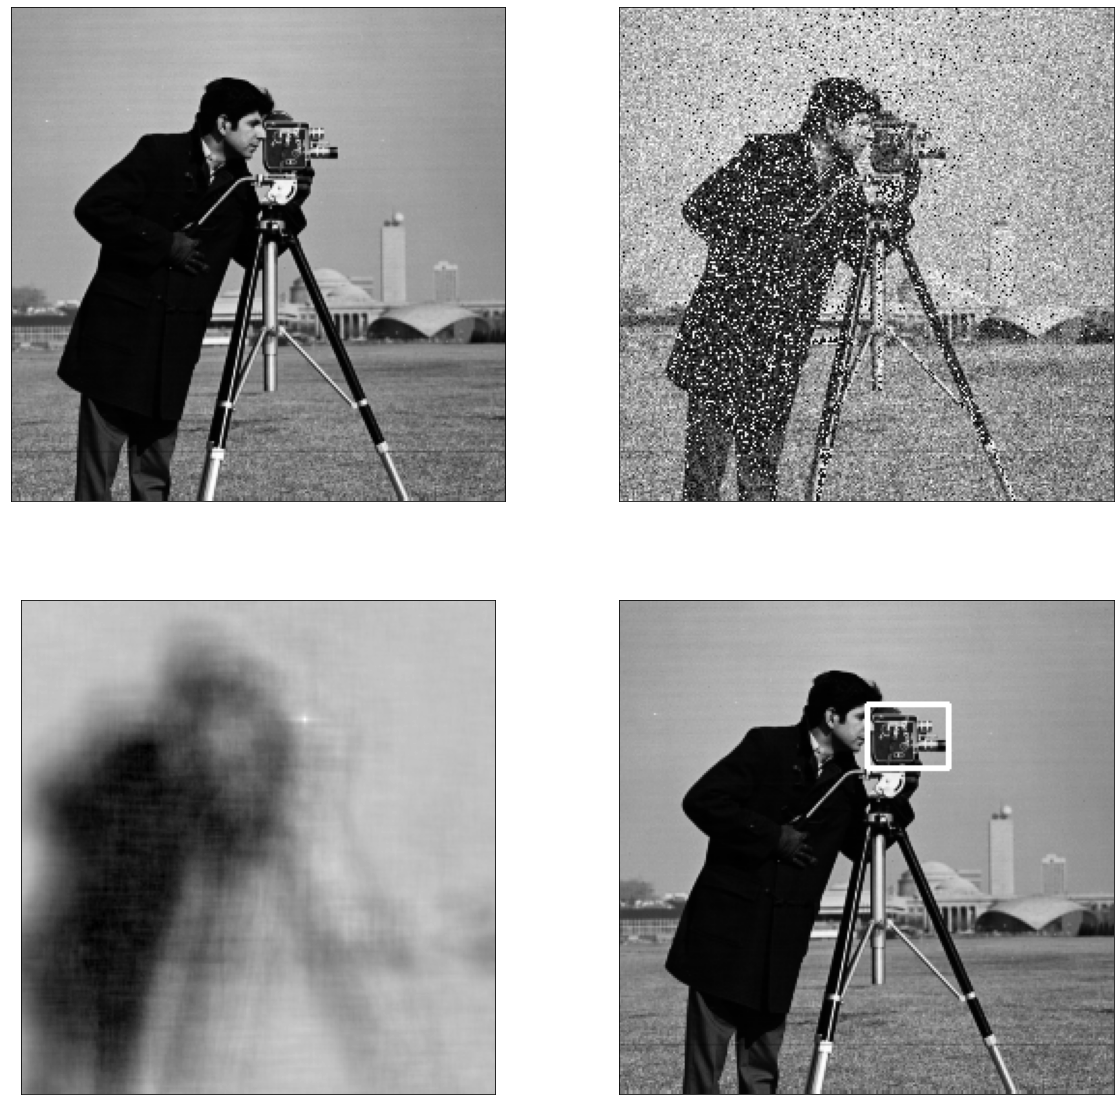

In [ ]:
pic1_orig = cv2.imread('cameraman.tif',0)
image1_np=np.array(pic1_orig, dtype='uint8')
template = cv2.imread('template.jpg',0)
w, h = template.shape[::-1]

noisy_img = np.array(image1_np + (20 - np.random.normal(0, 30, image1_np.shape)), dtype='uint8')
noisy_img_clipped = np.clip(noisy_img, 0, 255)

res = cv2.matchTemplate(noisy_img_clipped, template, cv2.TM_CCORR_NORMED)

_,_,_,top_left = cv2.minMaxLoc(res)
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(image1_np,top_left, bottom_right, 255, 2)

plt.figure(figsize = (20,20))
plt.subplot(2,2,1), plt.xticks([]), plt.yticks([]), plt.imshow(pic1_orig, cmap='gray')
plt.subplot(2,2,2), plt.xticks([]), plt.yticks([]), plt.imshow(noisy_img_clipped, cmap='gray')
plt.subplot(2,2,3), plt.xticks([]), plt.yticks([]), plt.imshow(res, cmap='gray')
plt.subplot(2,2,4), plt.xticks([]), plt.yticks([]), plt.imshow(image1_np, cmap='gray')

#CNN

11493376/11490434 [==============================] - 0s 0us/step

 ----- Value = 2


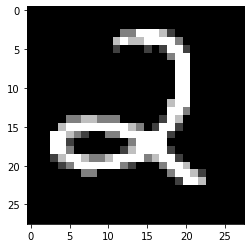

In [ ]:
#Downloading the Mnist Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
image_index = 22356
plt.imshow(x_train[image_index], cmap='gray')
print('\n ----- Value = ' + str(y_train[image_index]))

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing by dividing it to the max value.
x_train /= 255
x_test /= 255
print('\n ----- x_train shape:', x_train.shape)
print('\n ----- Number of images in x_train = ', x_train.shape[0])
print('\n ----- Number of images in x_test  = ', x_test.shape[0])


 ----- x_train shape: (60000, 28, 28, 1)

 ----- Number of images in x_train =  60000

 ----- Number of images in x_test  =  10000


In [ ]:
# Creating a Sequential Model and adding the layers
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(20, (5, 5), input_shape = (28,28,1), strides=1),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  tf.keras.layers.Conv2D(50, (5, 5), strides=1),
  tf.keras.layers.MaxPooling2D((2, 2), strides=2),
  tf.keras.layers.Conv2D(500, (4, 4), strides=1),
  tf.keras.layers.ReLU(),
  tf.keras.layers.Conv2D(10, (1, 1), strides=1),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Softmax()
])
model.summary()

#Compiling and Fitting the Model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)
model.fit(
    x=x_train,
    y=y_train,
    epochs=6,
    validation_data=(x_test, y_test)
)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 1, 1, 500)         400500    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 1, 1, 500)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 1, 10)         


 ----- Predicted number =  7


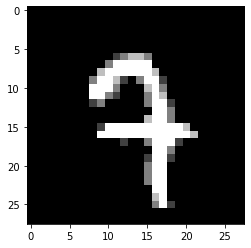

In [ ]:
image_index = 3333
plt.imshow(x_test[image_index].reshape(28, 28),cmap='gray')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print('\n ----- Predicted number = ', pred.argmax())